In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\sanja\\Downloads\\scrap price.csv")
df

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### The car company wants to enter a new market and needs an estimation of exactly which variables affect the car prices.
The goal is:

Which variables are significant in predicting the price of a car.
How well do those variables describe the price of a car

In [3]:
df.shape

(205, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.drop(columns=['ID','symboling'],axis=1,inplace=True)

In [6]:
df.sample(5)

,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
185,volkswagen type 3,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,109,mpfi,3.19,3.40,9.0,85,5250,27,34,8195.0
75,mercury cougar,gas,turbo,two,hatchback,rwd,front,102.7,178.4,68.0,...,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503.0
73,buick century special,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
26,dodge colt (sw),gas,std,four,sedan,fwd,front,93.7,157.3,63.8,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,7609.0
59,mazda 626,gas,std,two,hatchback,fwd,front,98.8,177.8,66.5,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8845.0


In [7]:
df.columns

Index(['name', 'fueltypes', 'aspiration', 'doornumbers', 'carbody',
       'drivewheels', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [8]:
len(df['name'].unique())

147

In [9]:
df['name'] = df['name'].str.split().str[0]

In [10]:
df['name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [11]:
df['name'] = df['name'].replace({'Nissan':'nissan','maxda':'mazda','porsche':'porcshce',
'toyouta':'toyota',"vokswagen":"volkswagen",'vw':'volkswagen'})

In [12]:
df['name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porcshce', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

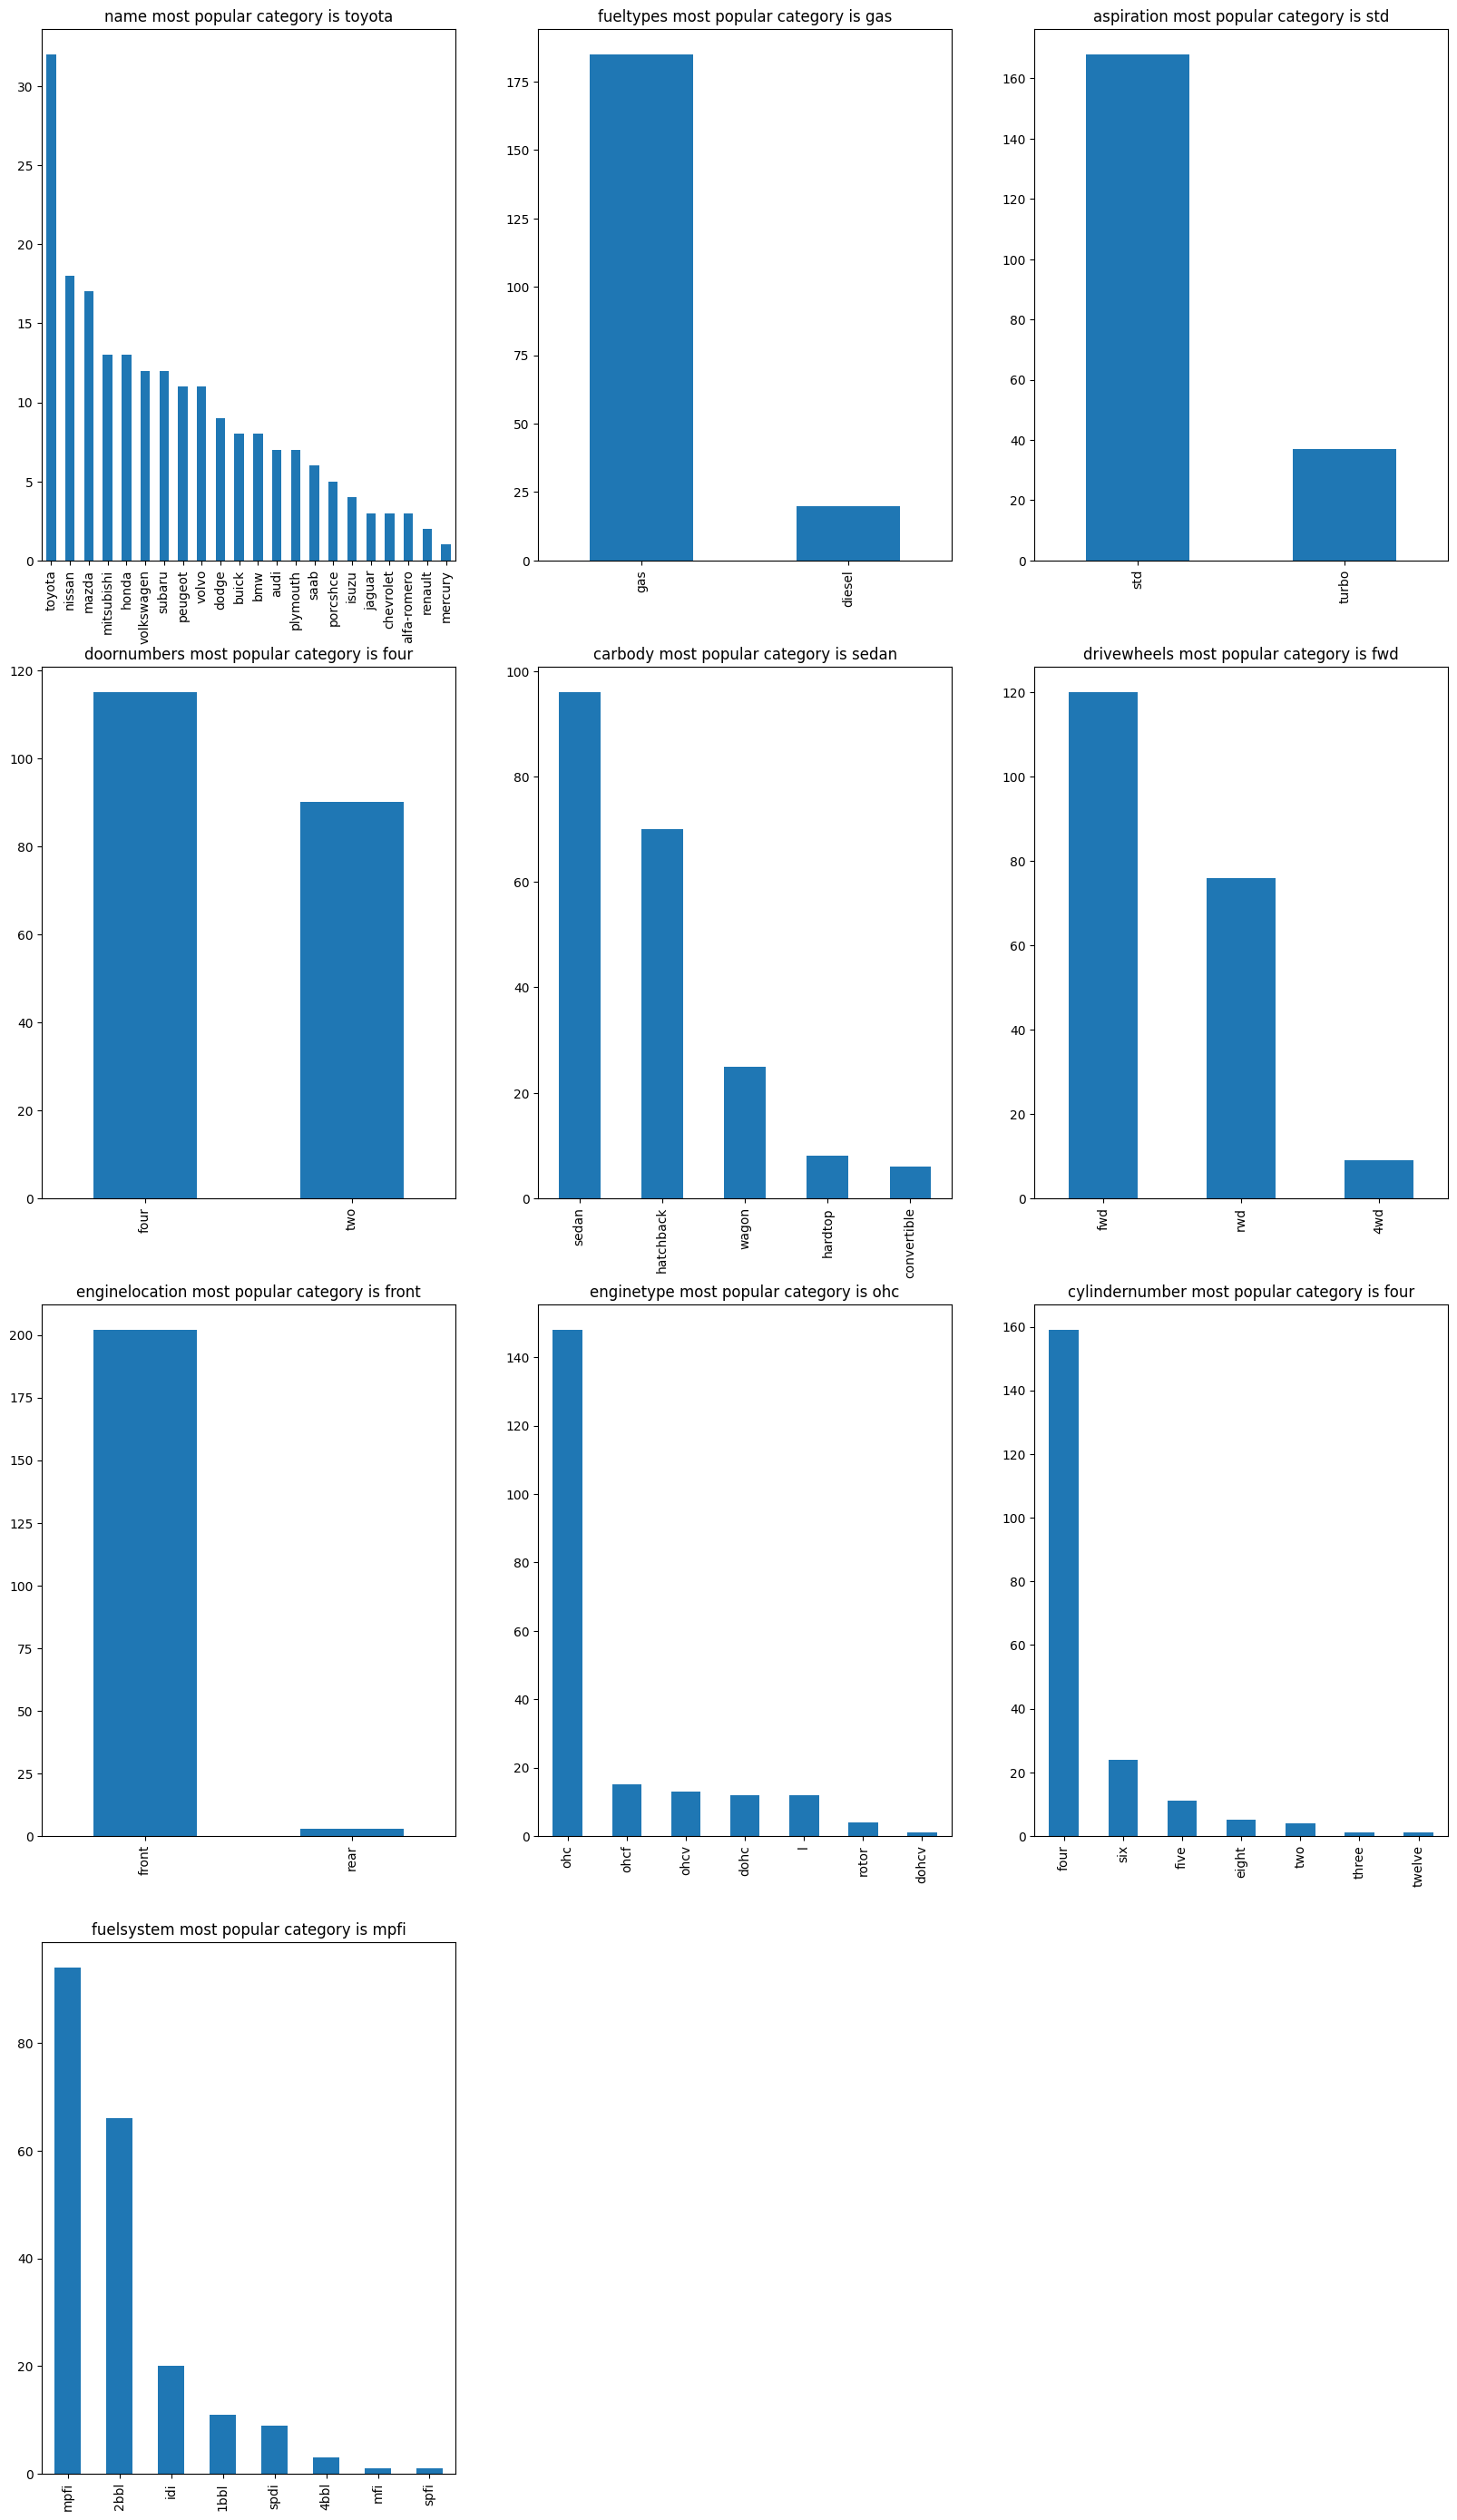

In [15]:
plt.figure(figsize = (20,35))
j=1
for i in df.columns:
    if df[i].dtype == 'object':
        plt.subplot(4,3,j)
        x = pd.DataFrame(df[i].value_counts())
        plt.title(f"{i} most popular category is {x.index[0]}")
        df[i].value_counts().plot(kind='bar')
        j = j+1

In [16]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)

name
fueltypes
aspiration
doornumbers
carbody
drivewheels
enginelocation
enginetype
cylindernumber
fuelsystem


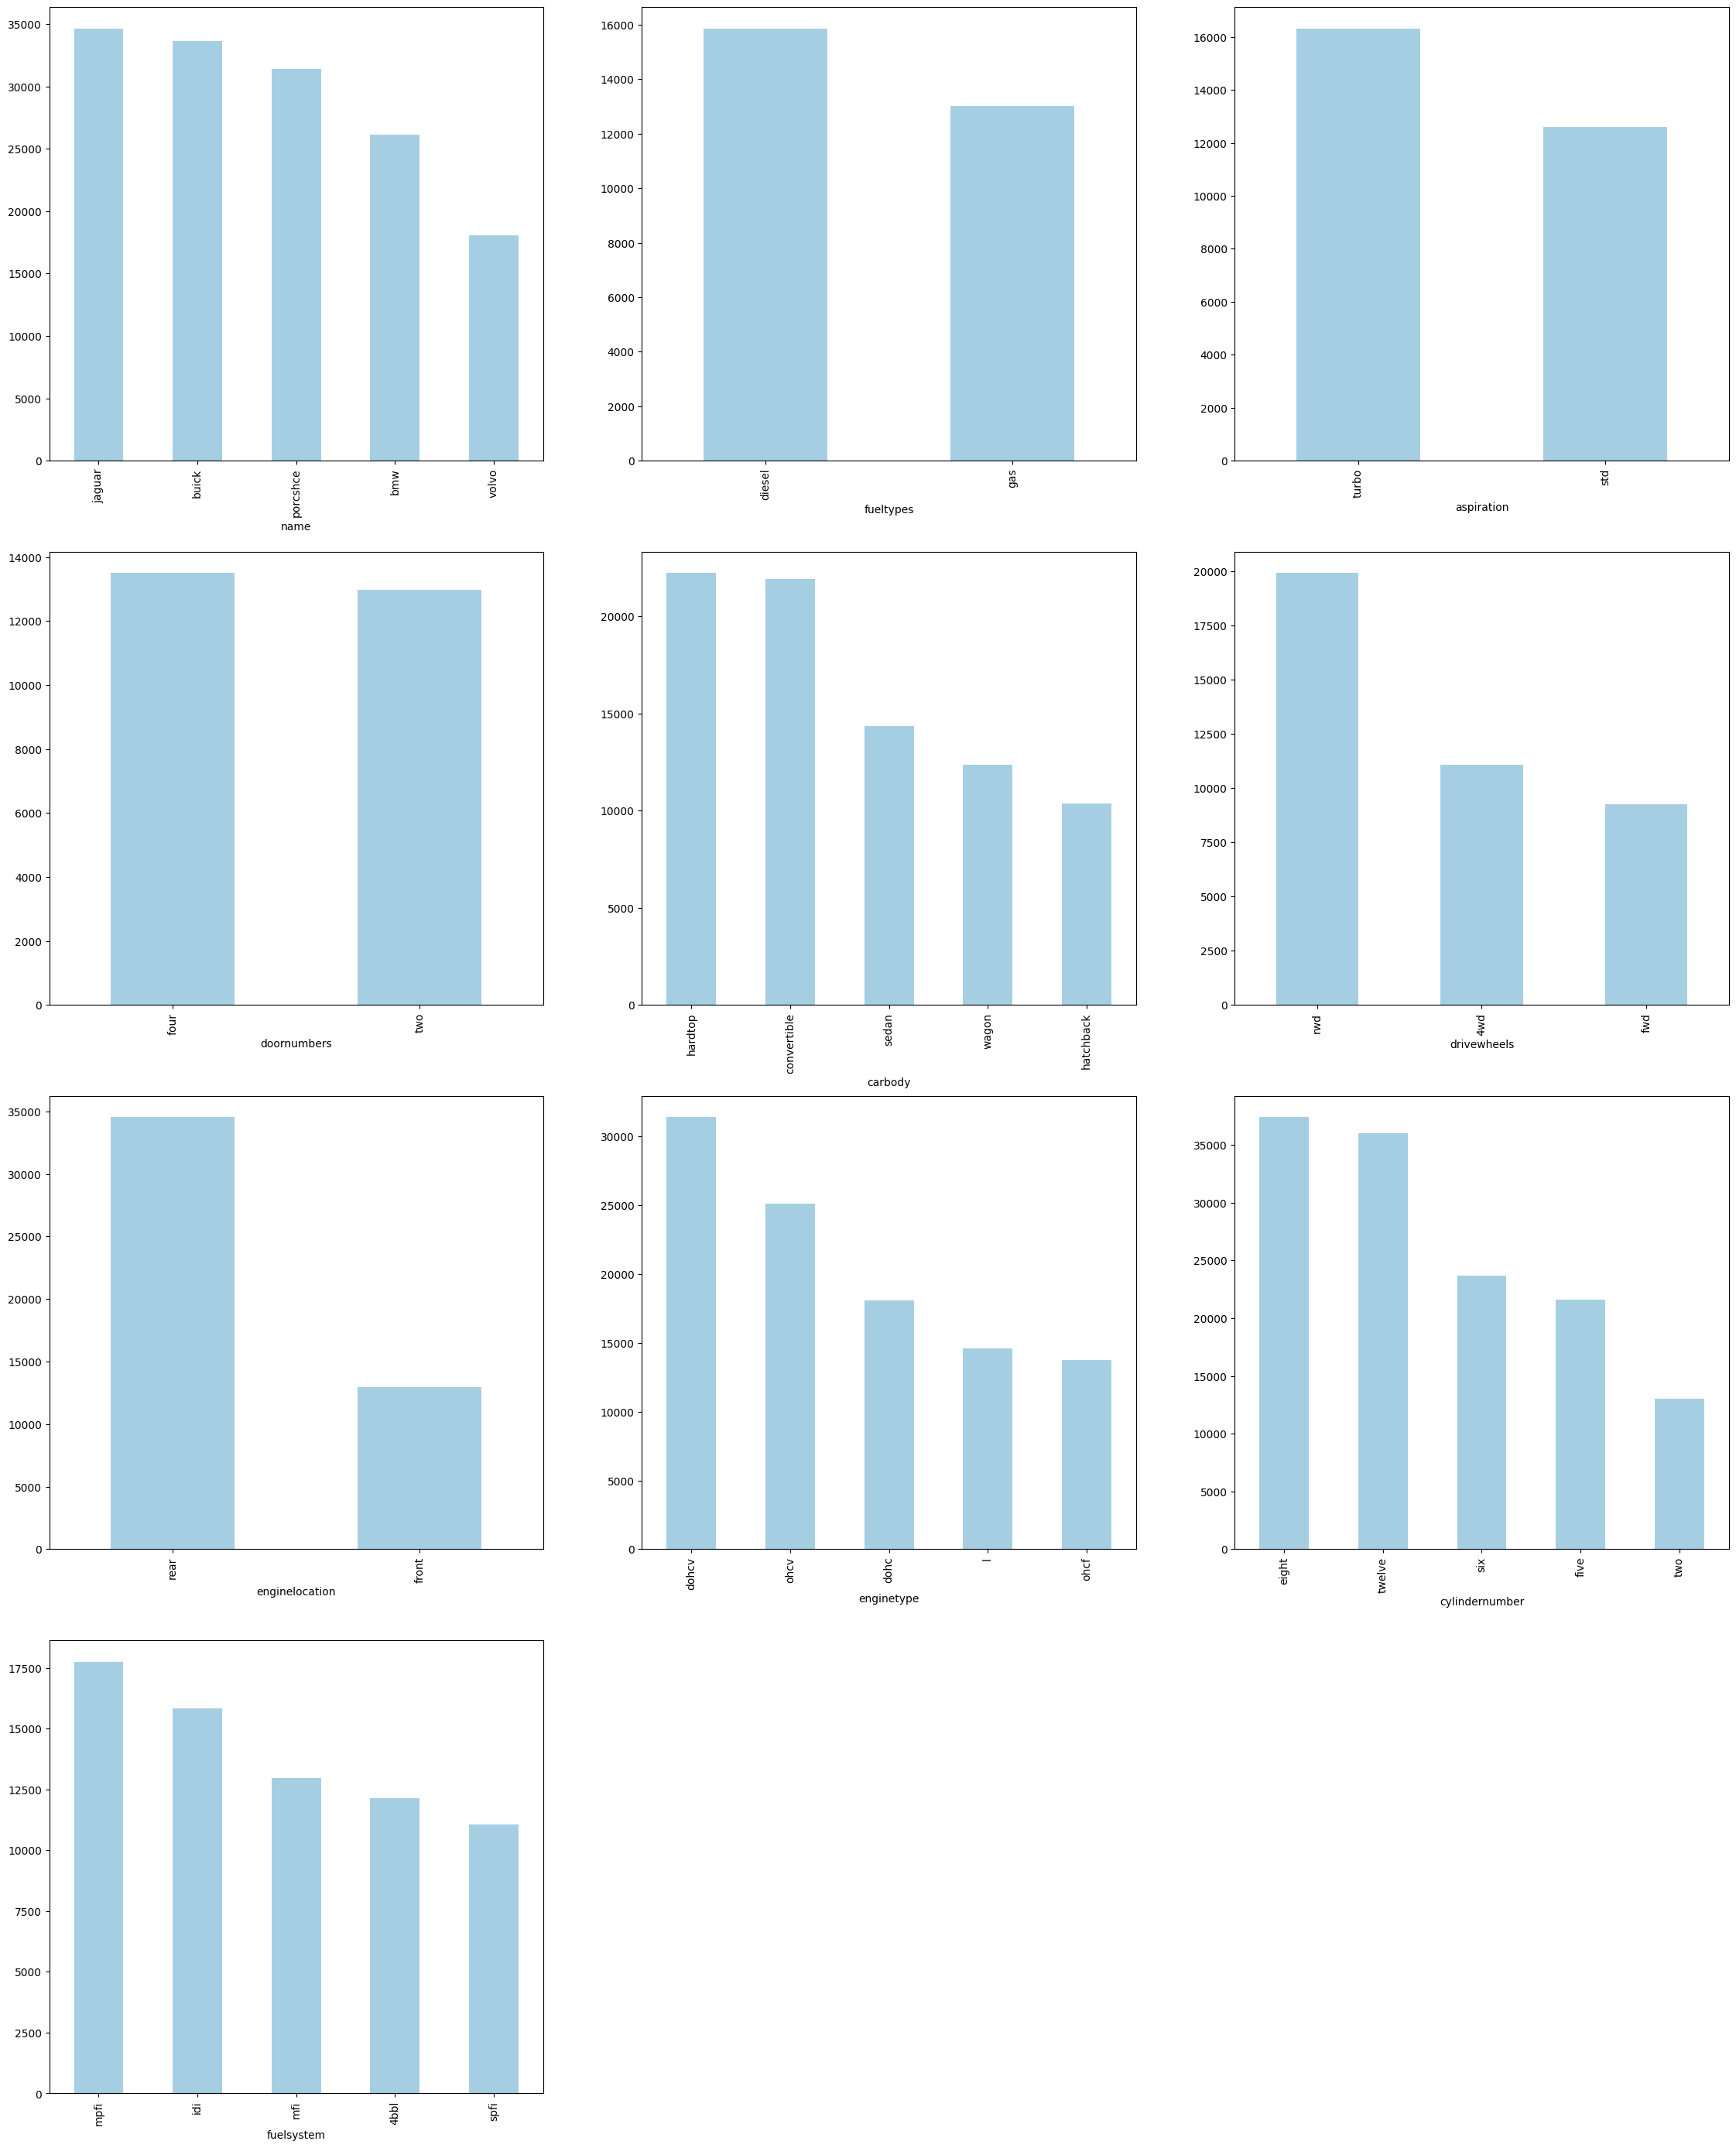

In [24]:
plt.figure(figsize = (28,35))
j= 1
for i in df.columns:
    if df[i].dtype == 'object':
       plt.subplot(4,3,j) 
       x = df.groupby([i])['price'].mean().nlargest()
       x.plot(kind='bar',colormap='Paired')
       j = j+1
plt.show()       

A story rises from this graphs is
"Jaguar" car has highest price among all of cars, "Diesel" is costly, "turbo" engine, "4 door" car is little bit expensive, in carbody category 'hardtop', 'convertible' are almost same price, 'rwd' is expensive, those car is much expensive which has engine in 'front', 'eight' cylindered car and 'mpfi' fuel system is preferably high price.



In [26]:
df['doornumbers'] = df['doornumbers'].map({'two':2,"four":4})

In [27]:
df['cylindernumber'] = df['cylindernumber'].map({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})

In [29]:
df.dtypes

name                 object
fueltypes            object
aspiration           object
doornumbers           int64
carbody              object
drivewheels          object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber        int64
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder

In [35]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = LabelEncoder().fit_transform(df[i])


In [36]:
df.dtypes

name                  int32
fueltypes             int32
aspiration            int32
doornumbers           int64
carbody               int32
drivewheels           int32
enginelocation        int32
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int32
cylindernumber        int64
enginesize            int64
fuelsystem            int32
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

<Axes: >

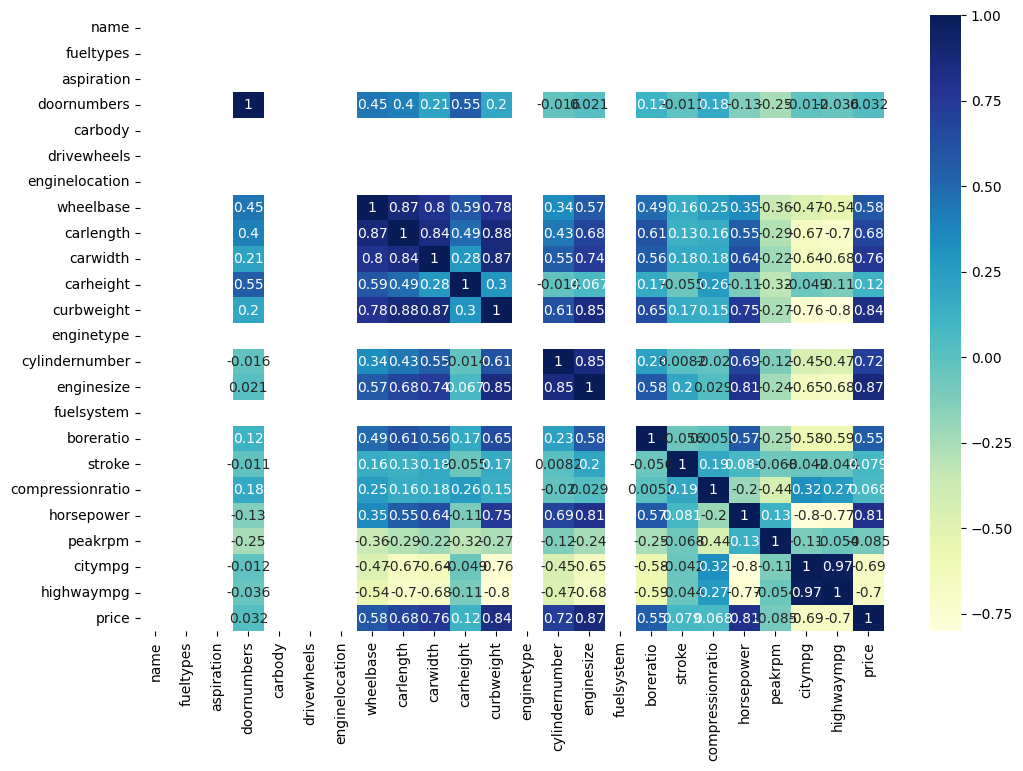

In [37]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
LR = LinearRegression()

In [12]:
LR.fit(x_train, y_train)

ValueError: could not convert string to float: 'mazda rx-7 gs'